In [1]:
#installing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.datasets as dt
import statsmodels.api as sm
import datetime as dm
import seaborn as sns
import random as rnd
from statsmodels.sandbox.tools import cross_val
%matplotlib inline

C:\Users\JAINMOD\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#data structure
s = pd.Series([1,2,3,np.NaN,7,9])
s

0    1.0
1    2.0
2    3.0
3    NaN
4    7.0
5    9.0
dtype: float64

In [3]:
dates = pd.date_range('20170701',periods=5)
dates

DatetimeIndex(['2017-07-01', '2017-07-02', '2017-07-03', '2017-07-04',
               '2017-07-05'],
              dtype='datetime64[ns]', freq='D')

In [4]:
dates_yr = pd.date_range('20160701',periods=365)
dates_yr

DatetimeIndex(['2016-07-01', '2016-07-02', '2016-07-03', '2016-07-04',
               '2016-07-05', '2016-07-06', '2016-07-07', '2016-07-08',
               '2016-07-09', '2016-07-10',
               ...
               '2017-06-21', '2017-06-22', '2017-06-23', '2017-06-24',
               '2017-06-25', '2017-06-26', '2017-06-27', '2017-06-28',
               '2017-06-29', '2017-06-30'],
              dtype='datetime64[ns]', length=365, freq='D')

In [5]:
df = pd.DataFrame(np.random.randn(8,5))
df

,0,1,2,3,4
0,-0.953440,-0.236777,-1.489572,-0.815080,-0.206204
1,-1.110900,1.196812,1.424328,1.272495,-1.515293
2,0.661356,-0.648275,1.409424,-0.309469,-1.049590
3,-0.857481,-0.067792,-0.035567,0.245037,0.908140
4,1.151991,0.192501,-0.000542,0.980900,-2.198475
5,-0.490735,-0.354308,1.410084,1.524953,1.735032
6,-1.140575,0.837194,0.501492,0.005063,0.339800
7,0.712474,1.275414,0.574734,0.258075,-0.570409


In [6]:
# Creating Data frame by using index and colum names
df1 = pd.DataFrame(np.random.randn(5,5), index =dates, columns =list('ABCDE'))
df1
df2 = pd.DataFrame(np.random.randn(5,5), index = ['Blue','Orange','Pink','Red','Purple'], columns =list('ABCDE'))
df2


,A,B,C,D,E
Blue,-1.344977,-0.330012,0.724405,-0.335564,2.204964
Orange,-0.443848,0.325328,-0.250747,-0.125544,-0.865813
Pink,0.510590,-1.613125,0.918624,-0.955438,-0.011473
Red,-0.219166,0.421965,1.086898,0.254767,-0.310847
Purple,0.064797,1.060030,0.796847,0.731881,-0.072175


In [7]:
# Strings
string = 'Hello'
if 'H' and 'f' in string :
    print('It is available')
else :
    print('Not there')

Not there


In [8]:
s1 = pd.Series(np.random.randn(5),name = "Testing")
s1


0   -0.810307
1    0.668926
2    1.346459
3   -0.162028
4   -1.045669
Name: Testing, dtype: float64

In [9]:
#importing Boston data for Analysis
input_raw = dt.get_rdataset("Boston", "MASS").data
input_raw.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
#Importing HR Analytcs dataset
pay_equity = pd.read_csv('C:/Users/JAINMOD/Desktop/Respiratory/Python Learning/data.csv')
pay_equity.head()

,Emp_ID,Division,Site,Family,Band,Gender,DOJ,Comp
0,1,PHARMA,CADO,Sales,4,Male,10/24/2016,92679.36127
1,2,PHARMA,CADO,Sales,3,Male,9/9/2002,149186.59570
2,3,PHARMA,CADO,Sales,4,Male,10/9/2007,145547.56730
3,4,PHARMA,CADO,Sales,6,Female,1/6/1997,113265.97200
4,5,PHARMA,CADO,Sales,4,Male,3/5/2001,142829.44750


In [11]:
#Creating a conditional column
pay_equity['Male'] = np.where(pay_equity['Gender'] == "Male",1,0)
pay_equity.head()
pay_equity_new = pay_equity.copy()
pay_equity_new=pay_equity_new.drop(['Gender'], axis =1)
pay_equity_new.head()

,Emp_ID,Division,Site,Family,Band,DOJ,Comp,Male
0,1,PHARMA,CADO,Sales,4,10/24/2016,92679.36127,1
1,2,PHARMA,CADO,Sales,3,9/9/2002,149186.59570,1
2,3,PHARMA,CADO,Sales,4,10/9/2007,145547.56730,1
3,4,PHARMA,CADO,Sales,6,1/6/1997,113265.97200,0
4,5,PHARMA,CADO,Sales,4,3/5/2001,142829.44750,1


In [12]:
# dropping rows
pay_equity_new=pay_equity_new.drop(pay_equity_new.index[3:8])
pay_equity_new.head()

,Emp_ID,Division,Site,Family,Band,DOJ,Comp,Male
0,1,PHARMA,CADO,Sales,4,10/24/2016,92679.36127,1
1,2,PHARMA,CADO,Sales,3,9/9/2002,149186.59570,1
2,3,PHARMA,CADO,Sales,4,10/9/2007,145547.56730,1
8,9,ONCOLOGY,CADO,Sales,5,9/2/2002,105427.81690,0
9,10,SANDOZ,CABV,Sales,3,9/28/2009,199508.53890,1


TypeError: ufunc subtract cannot use operands with types dtype('O') and dtype('<M8[ns]')

In [14]:
# creating calculaed clomn using date function
pay_equity['today'] = pd.to_datetime(dm.date.today())
pay_equity['Tenure'] = pay_equity['today'] - pay_equity['DOJ']
pay_equity['Tenure_yr'] = (pay_equity['Tenure'])/np.timedelta64(365, 'D')
pay_equity2 = pay_equity.drop(['today','Tenure'], axis=1)
pay_equity3 =pay_equity2.rename(columns ={'Tenure_yr' : 'Tenure'})
pay_equity3

,Emp_ID,Division,Site,Family,Band,Gender,DOJ,Comp,Male,Date,Tenure
0,1,PHARMA,CADO,Sales,4,Male,2016-10-24,92679.36127,1,2017-07-28,0.758904
1,2,PHARMA,CADO,Sales,3,Male,2002-09-09,149186.59570,1,2017-07-28,14.893151
2,3,PHARMA,CADO,Sales,4,Male,2007-10-09,145547.56730,1,2017-07-28,9.808219
3,4,PHARMA,CADO,Sales,6,Female,1997-01-06,113265.97200,0,2017-07-28,20.569863
4,5,PHARMA,CADO,Sales,4,Male,2001-03-05,142829.44750,1,2017-07-28,16.408219
5,6,PHARMA,CADO,Sales,4,Female,2008-12-15,146712.78210,0,2017-07-28,8.621918
6,7,PHARMA,CADO,Sales,4,Male,2001-11-26,147855.97120,1,2017-07-28,15.679452
7,8,SANDOZ,CABV,Sales,3,Male,2008-04-14,161103.65090,1,2017-07-28,9.293151
8,9,ONCOLOGY,CADO,Sales,5,Female,2002-09-02,105427.81690,0,2017-07-28,14.912329
9,10,SANDOZ,CABV,Sales,3,Male,2009-09-28,199508.53890,1,2017-07-28,7.835616


In [15]:
#grouping by 
pay_equity4 = pay_equity3.groupby(['Male','Band']).sum()
pay_equity5 = pay_equity3.groupby(['Male']).agg({'Comp':[np.sum,np.mean]})
pay_equity5

Comp               
               sum           mean
Male                             
0     2.073115e+07   90529.049147
1     2.348436e+07  107234.528669

In [16]:
#Transpose 
pay_equity4.T

Male                0                                                          \
Band                3             4             5             6             7   
Emp_ID     200.000000  1.933000e+03  4.720000e+03  3.850000e+04  7.366000e+03   
Comp    159622.291800  1.848062e+06  3.023134e+06  1.445943e+07  1.240908e+06   
Tenure      14.049315  1.450329e+02  2.847534e+02  1.120293e+03  2.551836e+02   

Male                1                                                          \
Band                1             3             4             5             6   
Emp_ID     405.000000  1.252000e+03  3.867000e+03  7.079000e+03  3.491100e+04   
Comp    244075.326500  1.499103e+06  3.144559e+06  4.560186e+06  1.399847e+07   
Tenure       1.123288  7.481096e+01  2.077726e+02  3.914986e+02  1.110715e+03   

Male                  
Band               7  
Emp_ID    343.000000  
Comp    37973.371320  
Tenure      2.273973

In [17]:
#to filter using isin needs to check again
pay_equity6 = pay_equity3.copy()
pay_equity6[pay_equity3['Division'].isin(['SANDOZ','PHARMA'])]
pay_equity6

,Emp_ID,Division,Site,Family,Band,Gender,DOJ,Comp,Male,Date,Tenure
0,1,PHARMA,CADO,Sales,4,Male,2016-10-24,92679.36127,1,2017-07-28,0.758904
1,2,PHARMA,CADO,Sales,3,Male,2002-09-09,149186.59570,1,2017-07-28,14.893151
2,3,PHARMA,CADO,Sales,4,Male,2007-10-09,145547.56730,1,2017-07-28,9.808219
3,4,PHARMA,CADO,Sales,6,Female,1997-01-06,113265.97200,0,2017-07-28,20.569863
4,5,PHARMA,CADO,Sales,4,Male,2001-03-05,142829.44750,1,2017-07-28,16.408219
5,6,PHARMA,CADO,Sales,4,Female,2008-12-15,146712.78210,0,2017-07-28,8.621918
6,7,PHARMA,CADO,Sales,4,Male,2001-11-26,147855.97120,1,2017-07-28,15.679452
7,8,SANDOZ,CABV,Sales,3,Male,2008-04-14,161103.65090,1,2017-07-28,9.293151
8,9,ONCOLOGY,CADO,Sales,5,Female,2002-09-02,105427.81690,0,2017-07-28,14.912329
9,10,SANDOZ,CABV,Sales,3,Male,2009-09-28,199508.53890,1,2017-07-28,7.835616


In [18]:
#cumulatice sum
pay_equity3['Cum_Comp'] = pay_equity3.Comp.cumsum()
pay_equity3

,Emp_ID,Division,Site,Family,Band,Gender,DOJ,Comp,Male,Date,Tenure,Cum_Comp
0,1,PHARMA,CADO,Sales,4,Male,2016-10-24,92679.36127,1,2017-07-28,0.758904,9.267936e+04
1,2,PHARMA,CADO,Sales,3,Male,2002-09-09,149186.59570,1,2017-07-28,14.893151,2.418660e+05
2,3,PHARMA,CADO,Sales,4,Male,2007-10-09,145547.56730,1,2017-07-28,9.808219,3.874135e+05
3,4,PHARMA,CADO,Sales,6,Female,1997-01-06,113265.97200,0,2017-07-28,20.569863,5.006795e+05
4,5,PHARMA,CADO,Sales,4,Male,2001-03-05,142829.44750,1,2017-07-28,16.408219,6.435089e+05
5,6,PHARMA,CADO,Sales,4,Female,2008-12-15,146712.78210,0,2017-07-28,8.621918,7.902217e+05
6,7,PHARMA,CADO,Sales,4,Male,2001-11-26,147855.97120,1,2017-07-28,15.679452,9.380777e+05
7,8,SANDOZ,CABV,Sales,3,Male,2008-04-14,161103.65090,1,2017-07-28,9.293151,1.099181e+06
8,9,ONCOLOGY,CADO,Sales,5,Female,2002-09-02,105427.81690,0,2017-07-28,14.912329,1.204609e+06
9,10,SANDOZ,CABV,Sales,3,Male,2009-09-28,199508.53890,1,2017-07-28,7.835616,1.404118e+06


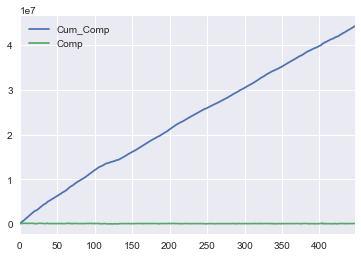

In [19]:
#Checking distribution
plt.figure(); pay_equity3.Cum_Comp.plot(); pay_equity3.Comp.plot(); plt.legend(loc='best')

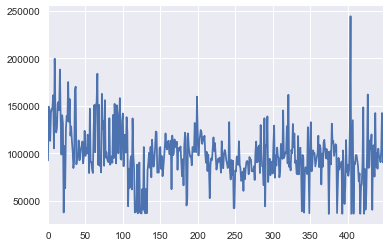

In [20]:
# checking distribution
pay_equity3['Comp'].plot()

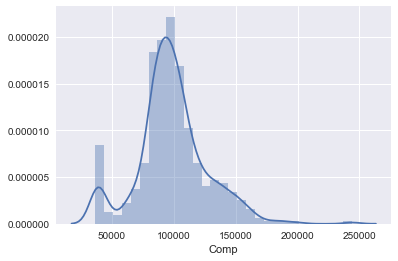

In [23]:
#Distibution plot of Compensation
sns.distplot(pay_equity3['Comp'])

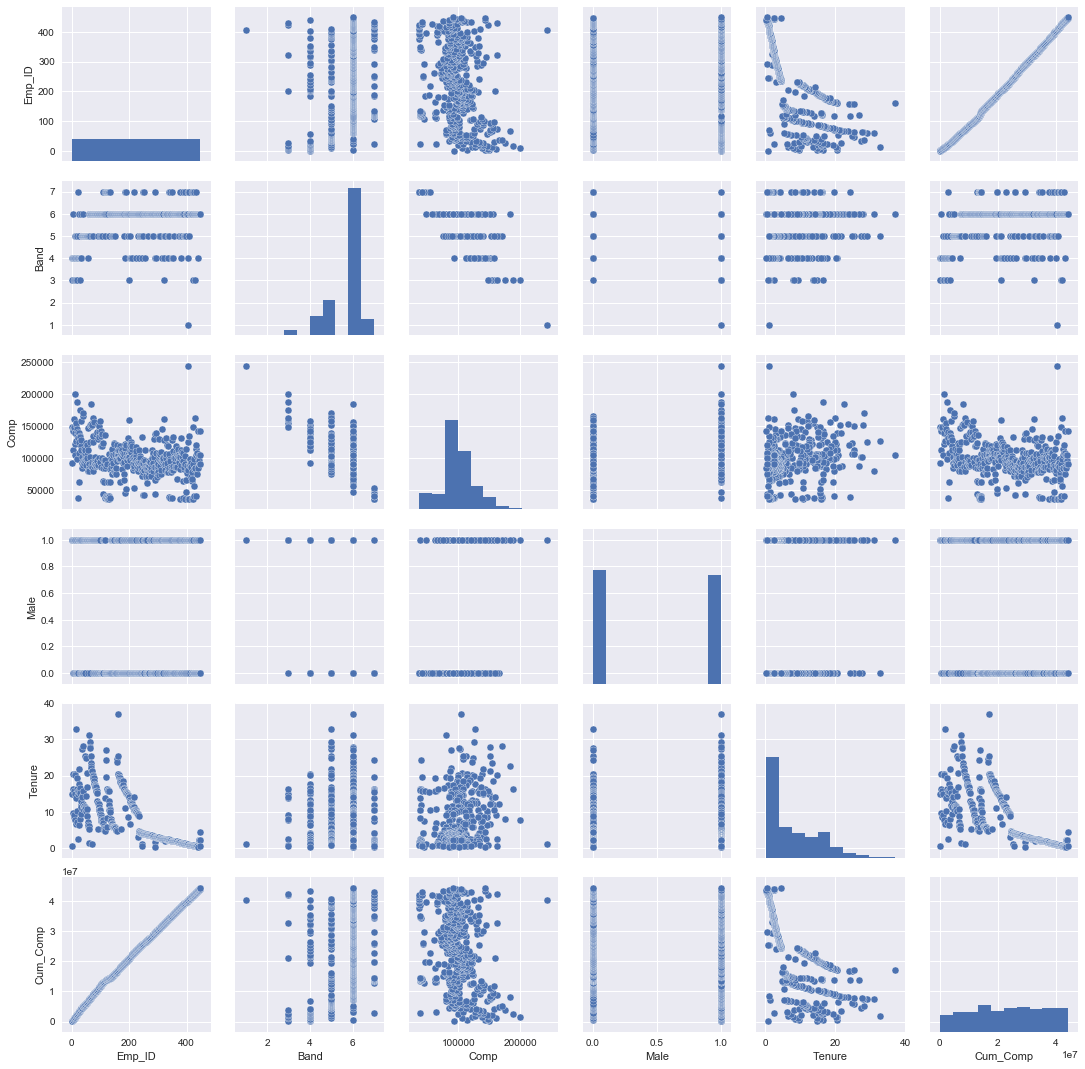

In [24]:
#pair plot of al variables
sns.pairplot(pay_equity3)

In [25]:
#Basic Statistics @@@Descritive Analysis@@@
pay_equity3.describe()

,Emp_ID,Band,Comp,Male,Tenure,Cum_Comp
count,448.000000,448.000000,448.000000,448.000000,448.000000,4.480000e+02
mean,224.500000,5.665179,98695.343824,0.488839,8.052471,2.315796e+07
std,129.470717,0.845804,28632.846447,0.500434,7.124599,1.242371e+07
min,1.000000,1.000000,36564.510080,0.000000,0.336986,9.267936e+04
25%,112.750000,5.000000,84485.103828,0.000000,2.408219,1.319066e+07
50%,224.500000,6.000000,96662.294775,0.000000,5.072603,2.358782e+07
75%,336.250000,6.000000,112340.407850,1.000000,12.895890,3.397989e+07
max,448.000000,7.000000,244075.326500,1.000000,36.980822,4.421551e+07


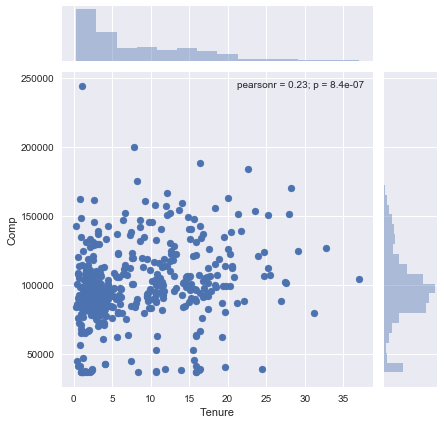

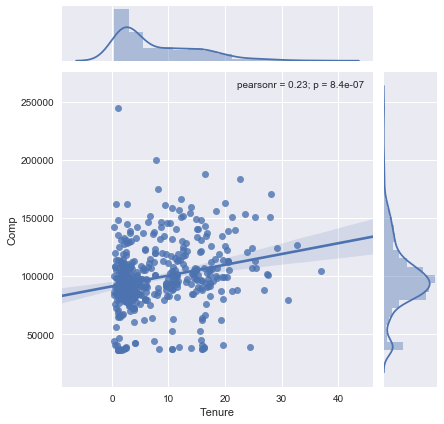

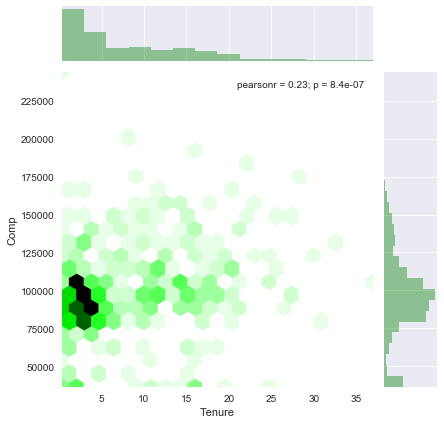

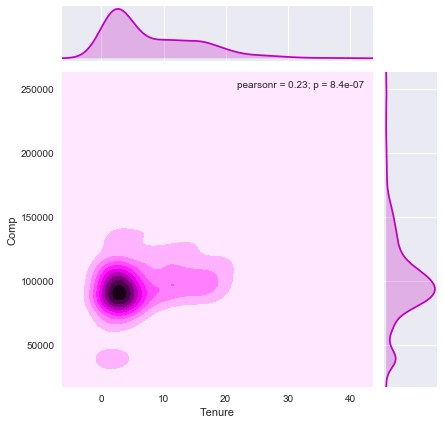

In [35]:
#Joint plot and saving figure in local drive
fig = plt.figure(figsize=[50,50])
sns.jointplot(y="Comp",x="Tenure", data =pay_equity3, kind  ="scatter")
sns.jointplot(y="Comp",x="Tenure", data =pay_equity3, kind  ="reg")
sns.jointplot(y="Comp",x="Tenure", data =pay_equity3, kind  ="hex", color = "g")
sns.jointplot(y="Comp",x="Tenure", data =pay_equity3, kind  ="kde", color = "m")
plt.savefig("C:/Users/JAINMOD/Desktop/Respiratory/Python Learning/Plots/figure.png")

In [36]:
#Descriptive Analysis
pay_equity3['Comp'].describe()


count       448.000000
mean      98695.343824
std       28632.846447
min       36564.510080
25%       84485.103828
50%       96662.294775
75%      112340.407850
max      244075.326500
Name: Comp, dtype: float64

In [38]:
#Null value treatment(replacing nulls with the mean)
pay_equity3 = pay_equity3.fillna(pay_equity3.mean())
pay_equity3

,Emp_ID,Division,Site,Family,Band,Gender,DOJ,Comp,Male,Date,Tenure,Cum_Comp
0,1,PHARMA,CADO,Sales,4,Male,2016-10-24,92679.36127,1,2017-07-28,0.758904,9.267936e+04
1,2,PHARMA,CADO,Sales,3,Male,2002-09-09,149186.59570,1,2017-07-28,14.893151,2.418660e+05
2,3,PHARMA,CADO,Sales,4,Male,2007-10-09,145547.56730,1,2017-07-28,9.808219,3.874135e+05
3,4,PHARMA,CADO,Sales,6,Female,1997-01-06,113265.97200,0,2017-07-28,20.569863,5.006795e+05
4,5,PHARMA,CADO,Sales,4,Male,2001-03-05,142829.44750,1,2017-07-28,16.408219,6.435089e+05
5,6,PHARMA,CADO,Sales,4,Female,2008-12-15,146712.78210,0,2017-07-28,8.621918,7.902217e+05
6,7,PHARMA,CADO,Sales,4,Male,2001-11-26,147855.97120,1,2017-07-28,15.679452,9.380777e+05
7,8,SANDOZ,CABV,Sales,3,Male,2008-04-14,161103.65090,1,2017-07-28,9.293151,1.099181e+06
8,9,ONCOLOGY,CADO,Sales,5,Female,2002-09-02,105427.81690,0,2017-07-28,14.912329,1.204609e+06
9,10,SANDOZ,CABV,Sales,3,Male,2009-09-28,199508.53890,1,2017-07-28,7.835616,1.404118e+06


In [42]:
#selecting random location for Taining & Test
from sklearn.datasets import load_boston
boston = load_boston()
boston.data

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.92830000e+02,   4.03000000e+00],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   5.64000000e+00],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.93450000e+02,   6.48000000e+00],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   7.88000000e+00]])

In [50]:
#creating data frame to convert array based data : Boston and calling the column name
boston_ref=pd.DataFrame(boston.data)
boston_ref.columns=boston.feature_names
boston_ref

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's

In [47]:
boston_model = boston_ref.copy()
boston_model['is_train']=np.random.uniform(0,1, len(boston_model))<= .8
pe_train = boston_model.loc[boston_model['is_train']==True,:]
pe_test = boston_model.loc[boston_model['is_train']==False,:]
del boston_model['is_train']
del pe_train['is_train']
del pe_test['is_train']


In [49]:
model = sm.OLS(pe_train.loc[:,'LSTAT'],pe_train.drop('LSTAT', axis = 1, inplace = False)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  LSTAT   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     342.3
Date:                Fri, 28 Jul 2017   Prob (F-statistic):          4.21e-204
Time:                        09:00:20   Log-Likelihood:                -1219.9
No. Observations:                 419   AIC:                             2464.
Df Residuals:                     407   BIC:                             2512.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM           0.1127      0.031      3.619      0.000       0.051       0.174
ZN             0.0151      0.014      1.048      0.295      -0.013       0.044
INDUS          0.0924      0.068      1.356      0.176      -0.042       0.226
CHAS          -1.2454      0.931     -1.338      0.182      -3.075       0.584
NOX           18.8726      3.216      5.869      0.000      12.551      25.194
RM            -2.8707      0.269    -10.658      0.000      -3.400      -2.341
AGE            0.0946      0.013      7.214      0.000       0.069       0.120
DIS            0.6635      0.196      3.384      0.001       0.278       1.049
RAD           -0.0337      0.066     -0.509      0.611      -0.164       0.096
TAX           -0.0004      0.004     -0.103      0.918      -0.008       0.008
PTRATIO        0.6144      0.107      5.717      0.000       0.403       0.826
B             -0.0031      0.003     -1.186      0.236      -0.008       0.002
==============================================================================
Omnibus:                       34.244   Durbin-Watson:                   1.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.554
Skew:                           0.257   Prob(JB):                     1.80e-26
Kurtosis:                       5.555   Cond. No.                     8.25e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
#models parameters estimates of all the variables
model.params

CRIM        0.112669
ZN          0.015135
INDUS       0.092441
CHAS       -1.245364
NOX        18.872561
RM         -2.870715
AGE         0.094599
DIS         0.663515
RAD        -0.033730
TAX        -0.000415
PTRATIO     0.614362
B          -0.003125
dtype: float64

In [53]:
#Deleting insignificant variables( p(t) >0.05)
model1 = sm.OLS(pe_train.loc[:,'LSTAT'],pe_train.drop(['LSTAT','TAX','RAD','ZN','INDUS','CHAS','B'], axis = 1, inplace = False)).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  LSTAT   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     681.6
Date:                Fri, 28 Jul 2017   Prob (F-statistic):          1.02e-210
Time:                        12:01:50   Log-Likelihood:                -1223.5
No. Observations:                 419   AIC:                             2459.
Df Residuals:                     413   BIC:                             2483.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM           0.1160      0.027      4.279      0.000       0.063       0.169
NOX           20.3786      2.745      7.425      0.000      14.983      25.774
RM            -3.0232      0.233    -12.994      0.000      -3.481      -2.566
AGE            0.0930      0.013      7.210      0.000       0.068       0.118
DIS            0.6780      0.160      4.228      0.000       0.363       0.993
PTRATIO        0.5960      0.088      6.775      0.000       0.423       0.769
==============================================================================
Omnibus:                       33.629   Durbin-Watson:                   1.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.666
Skew:                           0.235   Prob(JB):                     1.71e-26
Kurtosis:                       5.564   Cond. No.                         964.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
pe_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21


In [55]:
pe_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
18,0.80271,0.0,8.14,0.0,0.538,5.456,36.6,3.7965,4.0,307.0,21.0,288.99,11.69
19,0.72580,0.0,8.14,0.0,0.538,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28
21,0.85204,0.0,8.14,0.0,0.538,5.965,89.2,4.0123,4.0,307.0,21.0,392.53,13.83


In [61]:
#Creating new variable PREDICTED based on MODEL @@showing error WITH MODEL1@@
test1 = pe_test.copy()
test1['Predicted']= model.predict(test1.drop('LSTAT', axis=1, inplace = False))
test1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Predicted
3,0.03237,0.0,2.18,0.0,0.4580,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,7.176414
6,0.08829,12.5,7.87,0.0,0.5240,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,11.351067
18,0.80271,0.0,8.14,0.0,0.5380,5.456,36.6,3.7965,4.0,307.0,21.0,288.99,11.69,13.051144
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,15.058155
21,0.85204,0.0,8.14,0.0,0.5380,5.965,89.2,4.0123,4.0,307.0,21.0,392.53,13.83,16.390989
29,1.00245,0.0,8.14,0.0,0.5380,6.674,87.3,4.2390,4.0,307.0,21.0,380.23,11.98,14.381721
39,0.02763,75.0,2.95,0.0,0.4280,6.595,21.8,5.4011,3.0,252.0,18.3,395.63,4.32,6.002556
42,0.14150,0.0,6.91,0.0,0.4480,6.169,6.6,5.7209,3.0,233.0,17.9,383.37,5.81,5.421466
54,0.01360,75.0,4.00,0.0,0.4100,5.888,47.6,7.3197,3.0,469.0,21.1,396.90,14.80,13.127758
62,0.11027,25.0,5.13,0.0,0.4530,6.456,67.8,7.2255,8.0,284.0,19.7,396.90,6.73,12.563746


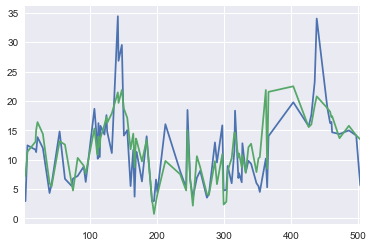

In [63]:
test1['LSTAT'].plot()
test1['Predicted'].plot()

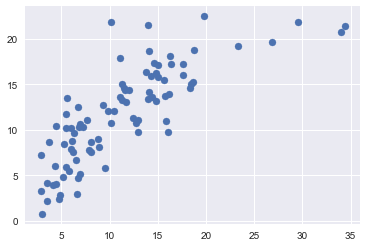

In [67]:
#generating scatter plot b/w actual and predicted @@can we use any other plot too??
plt.scatter(test1['LSTAT'],test1['Predicted'])

mean(|Actual - Predicted|/Actual)

In [68]:
mape = np.mean(np.abs(test1['LSTAT']-test1['Predicted'])/test1['LSTAT'])
print(mape)

0.32225128184049123


In [70]:
#Predicted valuse with model1
test2 = pe_test.copy()
test2['Predicted']= model1.predict(test2.drop(['LSTAT','TAX','RAD','ZN','INDUS','CHAS','B'], axis=1, inplace = False))
test2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Predicted
3,0.03237,0.0,2.18,0.0,0.4580,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,7.696062
6,0.08829,12.5,7.87,0.0,0.5240,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,11.537335
18,0.80271,0.0,8.14,0.0,0.5380,5.456,36.6,3.7965,4.0,307.0,21.0,288.99,11.69,13.056339
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,15.288710
21,0.85204,0.0,8.14,0.0,0.5380,5.965,89.2,4.0123,4.0,307.0,21.0,392.53,13.83,16.562767
29,1.00245,0.0,8.14,0.0,0.5380,6.674,87.3,4.2390,4.0,307.0,21.0,380.23,11.98,14.413706
39,0.02763,75.0,2.95,0.0,0.4280,6.595,21.8,5.4011,3.0,252.0,18.3,395.63,4.32,5.383269
42,0.14150,0.0,6.91,0.0,0.4480,6.169,6.6,5.7209,3.0,233.0,17.9,383.37,5.81,5.656354
54,0.01360,75.0,4.00,0.0,0.4100,5.888,47.6,7.3197,3.0,469.0,21.1,396.90,14.80,12.521800
62,0.11027,25.0,5.13,0.0,0.4530,6.456,67.8,7.2255,8.0,284.0,19.7,396.90,6.73,12.673028


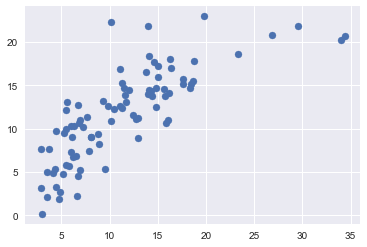

In [71]:
plt.scatter(test2['LSTAT'],test2['Predicted'])

In [74]:
mape = np.mean(np.abs(test2['LSTAT']-test2['Predicted'])/test2['LSTAT'])
print(mape)

0.3325041727310868


Mape has increased even after removing non significant variables. What to do in such scenario?

In [75]:
#K- Fold validations
kf = cross_val.KFold(boston_model.shape[0], k=10)

model ={}
count = 0
mape = {}
for train_index test_index in kf :
    X_train, X_test, y_train, y_test = cross_val.split(train_index, test_index, boston_model.drop('LSTAT', axis=1, inplace = False), boston_model['LSTAT'])
    model[count] = sm.OLS(y_train, X_train).fit()
    mape[count] = np.mean(np.abs(y_test - model[count].predict(X_test))/y_test)
    count+=1

In [77]:
model ={} 
count = 0 
mape = {} 
for train_index, test_index in kf :
    X_train, X_test, y_train, y_test = cross_val.split(train_index, test_index, boston_model.drop('LSTAT', axis=1, inplace = False), boston_model['LSTAT']) 
    model[count] = sm.OLS(y_train, X_train).fit() 
    mape[count] = np.mean(np.abs(y_test - model[count].predict(X_test))/y_test) 
    count+=1

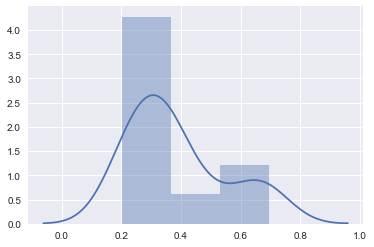

In [78]:
sns.distplot(list(mape.values()))

In [79]:
print('Bias:')
print(np.mean(list(mape.values())))
print()
print('Variance:')
print(np.std(list(mape.values())))
# Hyperparameter Tuning

Bias:
0.385470106694

Variance:
0.156759885244
